In [1]:
# Loading Necessary Libraries for Loan Prediction ML Pipeline (Feature Forge Project)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from joblib import dump, load

# Step 1. Data Exploration & Analysis

In [47]:
# === Load Data ===
train_df = pd.read_csv("C:\\Users\\kishr\\Desktop\\Tulsi\\Data sets from Kaggle\\train_data.csv")
test_df = pd.read_csv("C:\\Users\\kishr\\Desktop\\Tulsi\\Data sets from Kaggle\\test_data.csv")
print("Train shape:", train_df.shape)  
print("Test shape:", test_df.shape)    

Train shape: (614, 13)
Test shape: (367, 12)


In [93]:
# Preview
print(train_df.head())
print(train_df.info())
print(train_df.describe())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  is_train  
0             1.0         Urban           Y         1  
1             1.0         Rural           N   

In [95]:
# Check missing values
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
print("Missing values in Train:\n", missing_train[missing_train > 0])
print("Missing values in Test:\n", missing_test[missing_test > 0])

Missing values in Train:
 Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64
Missing values in Test:
 Gender               11
Dependents           10
Self_Employed        23
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Loan_Status         367
dtype: int64


# Handle Missing Values

In [101]:
 # Fill categorical columns with mode from respective datasets
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Fill numerical columns with median
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())

train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median())

train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].median())

In [103]:
print(train_df.isnull().sum(), test_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
is_train             0
dtype: int64 Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
is_train               0
Loan_Status          367
dtype: int64



=== Data Exploration ===
Train Missing Values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
is_train             0
dtype: int64


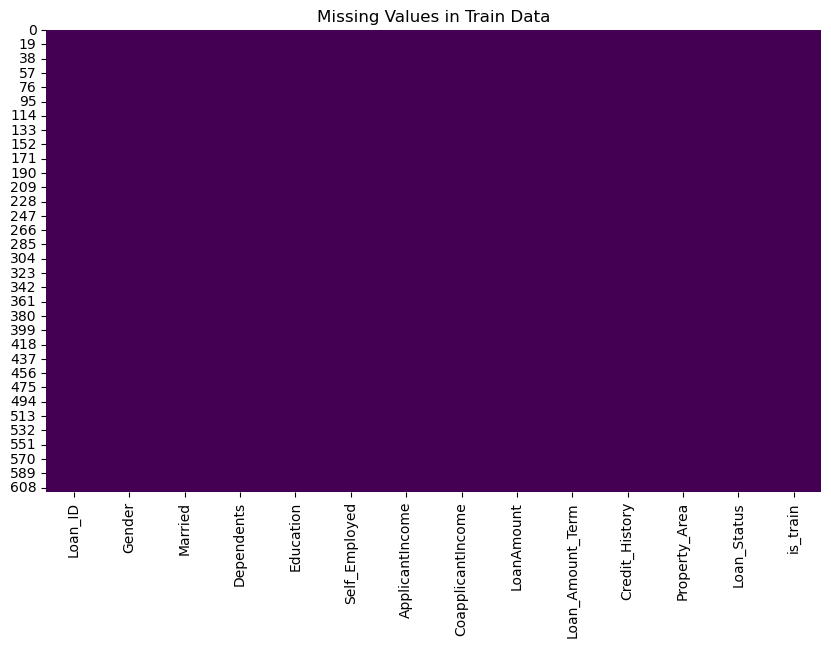

In [130]:
# === 1. Data Exploration and Analysis ===
print("\n=== Data Exploration ===")
# Missing values
print("Train Missing Values:\n", train_df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Data')
plt.show()


C:\Users\kishr\AppData\Local\Temp\ipykernel_15772\4053443089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Loan_Status', palette={'Y': 'red', 'N': 'green'})


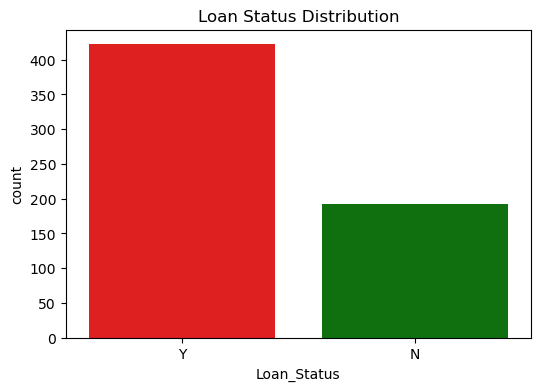

Class Balance:
 Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [132]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Loan_Status', palette={'Y': 'red', 'N': 'green'})
plt.title('Loan Status Distribution')
plt.show()
print("Class Balance:\n", train_df['Loan_Status'].value_counts(normalize=True))


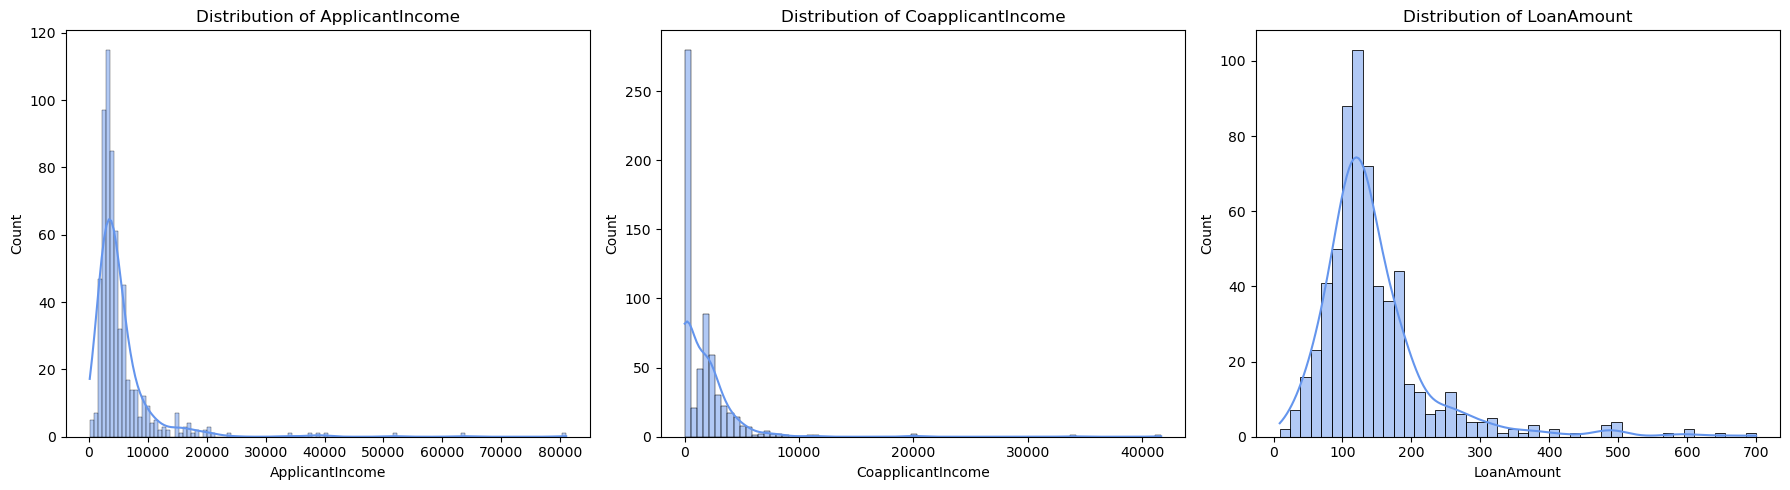

In [115]:

# Numerical distributions
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(18, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(train_df[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

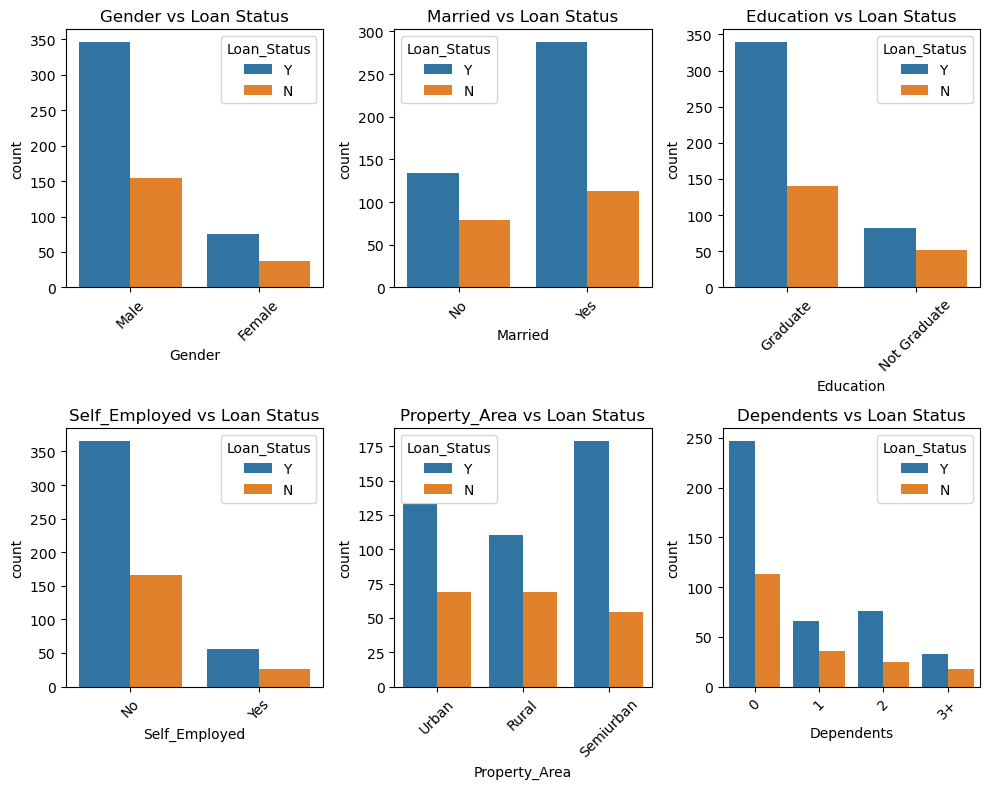

In [121]:
# Categorical vs. Loan_Status
# Categorical vs. Loan_Status
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

plt.figure(figsize=(10, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

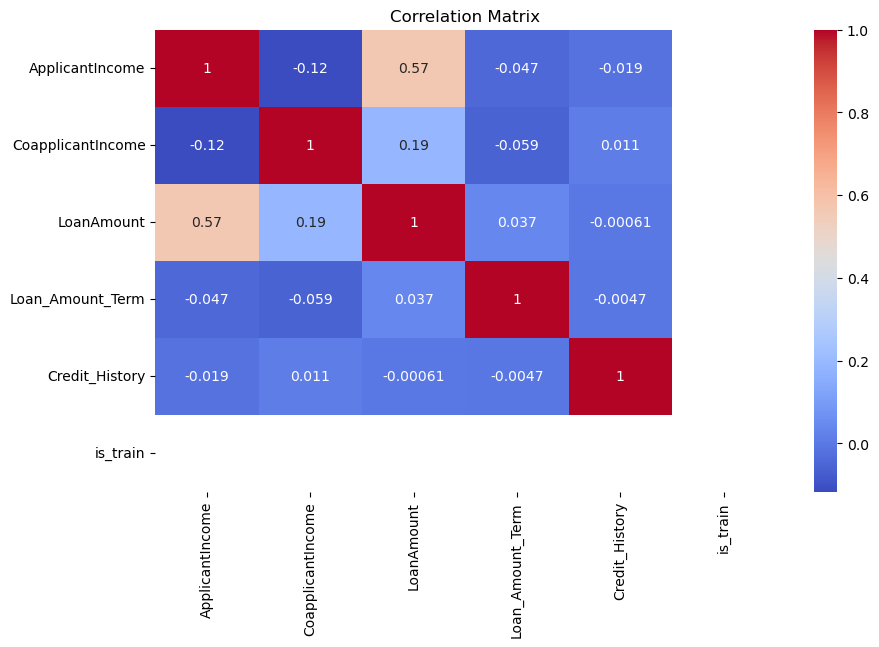

In [123]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 2. Feature Engineering & Selection

In [106]:
# === 2. Feature Engineering ===
print("\n=== Feature Engineering ===")
train_df['is_train'] = 1
test_df['is_train'] = 0
test_df['Loan_Status'] = np.nan
combined = pd.concat([train_df, test_df], ignore_index=True)


=== Feature Engineering ===


In [53]:
# Impute missing values
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']
credit_col = ['Credit_History']
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
combined[num_cols] = imputer_num.fit_transform(combined[num_cols])
combined[cat_cols] = imputer_cat.fit_transform(combined[cat_cols])
combined[credit_col] = imputer_cat.fit_transform(combined[credit_col])
combined['Credit_History'] = combined['Credit_History'].astype(float)

In [55]:
# Encode categorical variables
le = LabelEncoder()
le_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for col in le_cols:
    combined[col] = le.fit_transform(combined[col].astype(str))
combined = pd.get_dummies(combined, columns=['Dependents', 'Property_Area'], drop_first=True)

In [57]:
# Create new features
combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined['Loan_Income_Ratio'] = combined['LoanAmount'] / combined['Total_Income']
combined['EMI'] = combined['LoanAmount'] / combined['Loan_Amount_Term']
combined['LoanAmount_Log'] = np.log1p(combined['LoanAmount'])
combined['Total_Income_Log'] = np.log1p(combined['Total_Income'])
combined['Income_Percentile'] = pd.qcut(combined['Total_Income'], q=4, labels=[0, 1, 2, 3])
combined['Term_Category'] = pd.cut(combined['Loan_Amount_Term'], bins=[0, 180, 360, 480], labels=['Short', 'Medium', 'Long'])
combined = pd.get_dummies(combined, columns=['Term_Category'], drop_first=True)

In [59]:
# Scale numerical features
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
              'Total_Income', 'Loan_Income_Ratio', 'EMI', 'LoanAmount_Log', 'Total_Income_Log']
scaler = StandardScaler()
combined[scale_cols] = scaler.fit_transform(combined[scale_cols])

In [61]:
# Split back into train and test
train = combined[combined['is_train'] == 1].drop(['is_train', 'Loan_ID'], axis=1)
test = combined[combined['is_train'] == 0].drop(['is_train', 'Loan_ID', 'Loan_Status'], axis=1)
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']


=== Feature Selection ===


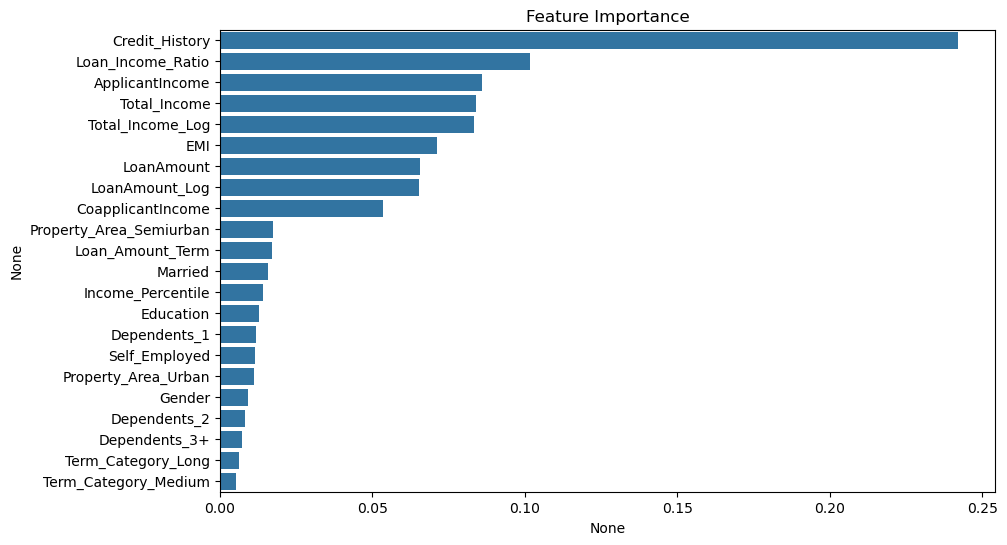

Feature Importance:
 Credit_History             0.242007
Loan_Income_Ratio          0.101580
ApplicantIncome            0.085839
Total_Income               0.083823
Total_Income_Log           0.083215
EMI                        0.071219
LoanAmount                 0.065476
LoanAmount_Log             0.065386
CoapplicantIncome          0.053469
Property_Area_Semiurban    0.017385
Loan_Amount_Term           0.017038
Married                    0.015674
Income_Percentile          0.014012
Education                  0.012939
Dependents_1               0.011980
Self_Employed              0.011363
Property_Area_Urban        0.011295
Gender                     0.009090
Dependents_2               0.008253
Dependents_3+              0.007339
Term_Category_Long         0.006378
Term_Category_Medium       0.005238
dtype: float64


In [63]:
# === Feature Selection ===
print("\n=== Feature Selection ===")
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance')
plt.show()
print("Feature Importance:\n", importances)

In [65]:
# Validate feature subsets
for n in [8, 10, 12, 15]:
    top_n = importances.head(n).index.tolist()
    X_temp = X[top_n]
    scores = cross_val_score(RandomForestClassifier(random_state=42), X_temp, y, cv=5, scoring='f1')
    print(f"F1 with top {n} features: {scores.mean():.3f}")

top_features = importances.head(12).index.tolist()
X = X[top_features]
test = test[top_features]
print("Selected features:", top_features)

F1 with top 8 features: 0.856
F1 with top 10 features: 0.866
F1 with top 12 features: 0.862
F1 with top 15 features: 0.869
Selected features: ['Credit_History', 'Loan_Income_Ratio', 'ApplicantIncome', 'Total_Income', 'Total_Income_Log', 'EMI', 'LoanAmount', 'LoanAmount_Log', 'CoapplicantIncome', 'Property_Area_Semiurban', 'Loan_Amount_Term', 'Married']


In [66]:
#=== Model Architecture Adjustments ===
print("\n=== Model Architecture Adjustments ===")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train dtypes:\n", X_train.dtypes)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name} F1: {f1_score(y_val, y_pred):.3f}")


=== Model Architecture Adjustments ===
X_train dtypes:
 Credit_History             float64
Loan_Income_Ratio          float64
ApplicantIncome            float64
Total_Income               float64
Total_Income_Log           float64
EMI                        float64
LoanAmount                 float64
LoanAmount_Log             float64
CoapplicantIncome          float64
Property_Area_Semiurban       bool
Loan_Amount_Term           float64
Married                      int32
dtype: object
Random Forest F1: 0.862
XGBoost F1: 0.821
Logistic Regression F1: 0.852


# Step 3. Model Training & Hyperparameter Tuning

In [69]:
# Hyperparameter Tuning 
print("\n Hyperparameter Tuning")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_model = grid.best_estimator_


 Hyperparameter Tuning
Best params: {'class_weight': None, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}


In [70]:
# === Cross-Validation and Regularization ===
print("\n=== Cross-Validation ===")
scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print(f"Random Forest CV F1: {scores.mean():.3f} ± {scores.std():.3f}")


=== Cross-Validation ===
Random Forest CV F1: 0.870 ± 0.013


In [71]:
# === Performance Evaluation ===
print("\n=== Performance Evaluation ===")
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_proba))


=== Performance Evaluation ===
Accuracy: 0.7804878048780488
Precision: 0.7623762376237624
Recall: 0.9625
F1 Score: 0.850828729281768
ROC AUC: 0.76875


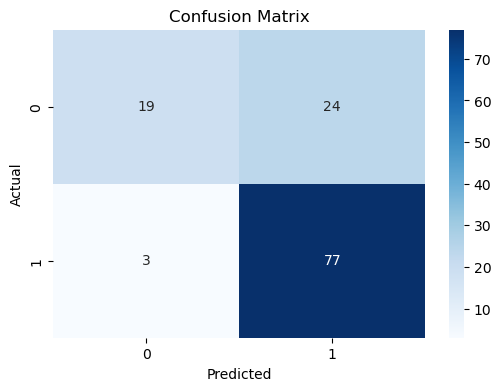

In [72]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

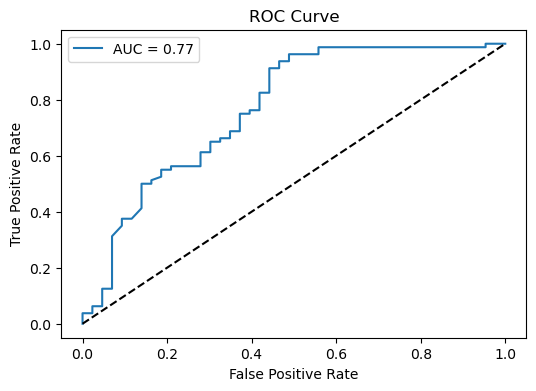

In [73]:
# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_val, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

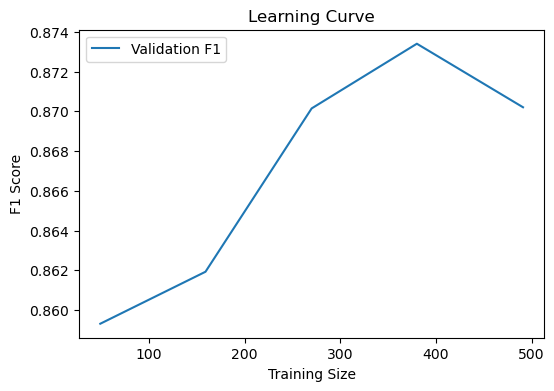

In [74]:
# Learning curve
train_sizes, train_scores, val_scores = learning_curve(best_model, X, y, cv=5, scoring='f1')
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation F1')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [75]:
# === Stress Testing and Validation ===
print("\n=== Stress Testing ===")


=== Stress Testing ===


In [76]:
# Test predictions
test_pred = best_model.predict(test)
test_pred_labels = np.where(test_pred == 1, 'Y', 'N')
print("Test Prediction Distribution:\n", pd.Series(test_pred_labels).value_counts(normalize=True))

Test Prediction Distribution:
 Y    0.836512
N    0.163488
Name: proportion, dtype: float64


In [77]:
# Stress test 1: Extreme LoanAmount
extreme_test = test.copy()
extreme_test['LoanAmount'] *= 10
extreme_pred = best_model.predict(extreme_test)
print("Extreme LoanAmount Approval Ratio:\n", pd.Series(np.where(extreme_pred == 1, 'Y', 'N')).value_counts(normalize=True))

Extreme LoanAmount Approval Ratio:
 Y    0.836512
N    0.163488
Name: proportion, dtype: float64


In [78]:
# Stress test 2: Noisy data
noisy_test = test.copy()
noisy_test += np.random.normal(0, 0.1, noisy_test.shape)
noisy_pred = best_model.predict(noisy_test)
print("Noisy Data Approval Ratio:\n", pd.Series(np.where(noisy_pred == 1, 'Y', 'N')).value_counts(normalize=True))

Noisy Data Approval Ratio:
 Y    0.833787
N    0.166213
Name: proportion, dtype: float64


# Step 4. Model Deployment

In [79]:
# === Deployment ===
print("\n=== Deployment ===")
final_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', best_model)
])
final_pipeline.fit(X, y)
dump(final_pipeline, 'loan_prediction_model.joblib')
print("Model saved as loan_prediction_model.joblib")

# Demo prediction
loaded_model = load('loan_prediction_model.joblib')
sample = test.iloc[:1]
print("Sample prediction:", np.where(loaded_model.predict(sample) == 1, 'Y', 'N'))


=== Deployment ===
Model saved as loan_prediction_model.joblib
Sample prediction: ['Y']
